<>:45: SyntaxWarning: invalid escape sequence '\P'
<>:45: SyntaxWarning: invalid escape sequence '\P'
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_2480\4228858314.py:45: SyntaxWarning: invalid escape sequence '\P'
  plt.ylabel('$\Phi(L)$ [$h^3$ Mpc$^{-3}$ ($L^*$)$^{-1}$]', fontsize=14)


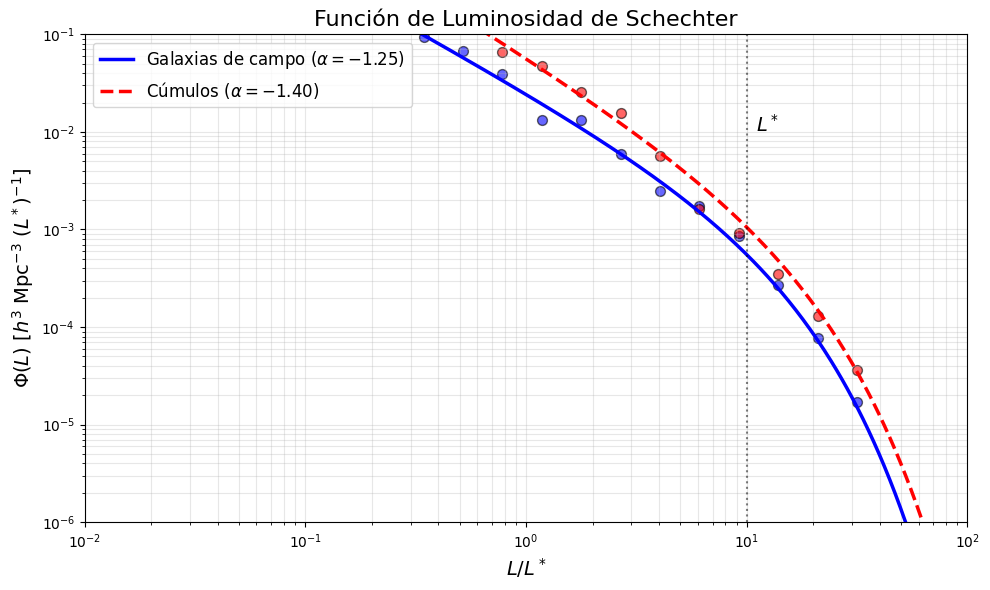

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator

# Parámetros de la función de Schechter
phi_star = 1.5e-2  # h^3 Mpc^-3
L_star = 10.0       # L* en unidades de 10^10 L_sun
alpha_field = -1.25  # Pendiente para campo
alpha_cluster = -1.40  # Pendiente para cúmulos

# Rango de luminosidades
L = np.logspace(-2, 2, 500)  # L/L*

# Calculamos las funciones
def schechter(L, phi_star, L_star, alpha):
    return (phi_star/L_star) * (L/L_star)**alpha * np.exp(-L/L_star)

phi_field = schechter(L, phi_star, L_star, alpha_field)
phi_cluster = schechter(L, phi_star*1.5, L_star*1.2, alpha_cluster)  # Mayor densidad en cúmulos

# Configuración del gráfico
plt.figure(figsize=(10, 6))


# Graficamos ambas funciones
plt.plot(L, phi_field, 'b-', lw=2.5, label='Galaxias de campo ($\\alpha=-1.25$)')
plt.plot(L, phi_cluster, 'r--', lw=2.5, label='Cúmulos ($\\alpha=-1.40$)')

# Marcamos L*
plt.axvline(x=L_star, color='k', linestyle=':', alpha=0.5)
plt.text(L_star*1.1, 1e-2, '$L^*$', fontsize=14)

# Añadimos datos observacionales simulados (puntos con dispersión)
L_obs = np.logspace(-1, 1.5, 15)
phi_obs_field = schechter(L_obs, phi_star, L_star, alpha_field) * np.random.normal(1, 0.15, 15)
phi_obs_cluster = schechter(L_obs, phi_star*1.5, L_star*1.2, alpha_cluster) * np.random.normal(1, 0.2, 15)

plt.scatter(L_obs, phi_obs_field, color='blue', s=50, alpha=0.6, edgecolor='k')
plt.scatter(L_obs, phi_obs_cluster, color='red', s=50, alpha=0.6, edgecolor='k')

# Configuración de ejes
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$L/L^*$', fontsize=14)
plt.ylabel('$\Phi(L)$ [$h^3$ Mpc$^{-3}$ ($L^*$)$^{-1}$]', fontsize=14)
plt.title('Función de Luminosidad de Schechter', fontsize=16)

# Leyenda y ajustes
plt.legend(fontsize=12, frameon=True)
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.xlim(1e-2, 1e2)
plt.ylim(1e-6, 1e-1)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('schechter_function.png', dpi=300)
plt.show()

<>:21: SyntaxWarning: invalid escape sequence '\o'
<>:36: SyntaxWarning: invalid escape sequence '\o'
<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\o'
<>:36: SyntaxWarning: invalid escape sequence '\o'
<>:37: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_2480\3299616444.py:21: SyntaxWarning: invalid escape sequence '\o'
  label=f"{sys['name']}\n({sys['mass'][0]:.0e}-{sys['mass'][1]:.0e} $M_\odot$)")
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_2480\3299616444.py:36: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Masa del Halo ($M_\odot$)', fontsize=12)
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_2480\3299616444.py:37: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Fracción Bariónica $M_*/M_{\mathrm{halo}}$', fontsize=12)


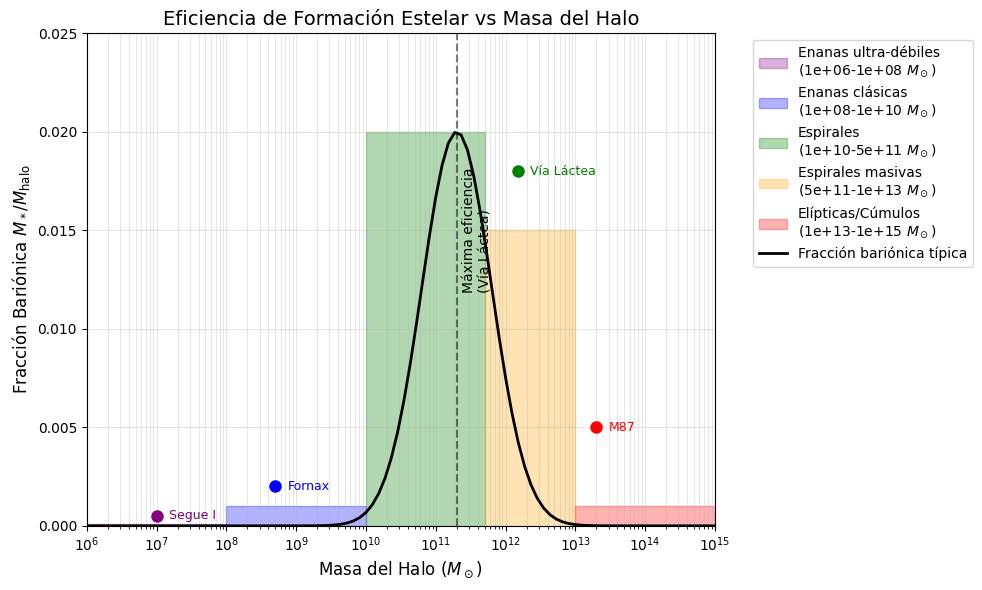

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator

# Configuración inicial
plt.figure(figsize=(10, 6))


# Rangos de masa para diferentes sistemas
systems = [
    {"name": "Enanas ultra-débiles", "mass": [1e6, 1e8], "color": "purple", "fbary": 0.0001},
    {"name": "Enanas clásicas", "mass": [1e8, 1e10], "color": "blue", "fbary": 0.001},
    {"name": "Espirales", "mass": [1e10, 5e11], "color": "green", "fbary": 0.02},
    {"name": "Espirales masivas", "mass": [5e11, 1e13], "color": "orange", "fbary": 0.015},
    {"name": "Elípticas/Cúmulos", "mass": [1e13, 1e15], "color": "red", "fbary": 0.001}
]

# Dibujar las regiones
for sys in systems:
    plt.fill_between(sys["mass"], [sys["fbary"]]*2, alpha=0.3, color=sys["color"], 
                    label=f"{sys['name']}\n({sys['mass'][0]:.0e}-{sys['mass'][1]:.0e} $M_\odot$)")

# Línea de eficiencia máxima
max_eff_mass = 2e11
plt.axvline(x=max_eff_mass, color='k', linestyle='--', alpha=0.5)
plt.text(max_eff_mass*1.2, 0.015, 'Máxima eficiencia\n(Vía Láctea)', rotation=90, va='center')

# Curva suave de fracción bariónica
mass_range = np.logspace(6, 15, 100)
fbary = 0.02 * np.exp(-(np.log10(mass_range/max_eff_mass))**2/0.5)
plt.plot(mass_range, fbary, 'k-', lw=2, label='Fracción bariónica típica')

# Configuración de ejes
plt.xscale('log')
plt.yscale('linear')
plt.xlabel('Masa del Halo ($M_\odot$)', fontsize=12)
plt.ylabel('Fracción Bariónica $M_*/M_{\mathrm{halo}}$', fontsize=12)
plt.title('Eficiencia de Formación Estelar vs Masa del Halo', fontsize=14)

# Leyenda y ajustes
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.ylim(0, 0.025)
plt.xlim(1e6, 1e15)

# Añadir ejemplos de galaxias
galaxy_examples = [
    {"name": "Segue I", "mass": 1e7, "y": 0.0005, "color": "purple"},
    {"name": "Fornax", "mass": 5e8, "y": 0.002, "color": "blue"},
    {"name": "Vía Láctea", "mass": 1.5e12, "y": 0.018, "color": "green"},
    {"name": "M87", "mass": 2e13, "y": 0.005, "color": "red"}
]

for g in galaxy_examples:
    plt.plot(g["mass"], g["y"], 'o', color=g["color"], markersize=8)
    plt.text(g["mass"]*1.5, g["y"], g["name"], color=g["color"], fontsize=9, va='center')

plt.tight_layout()
plt.savefig('mass_scales.png', dpi=300, bbox_inches='tight')
plt.show()

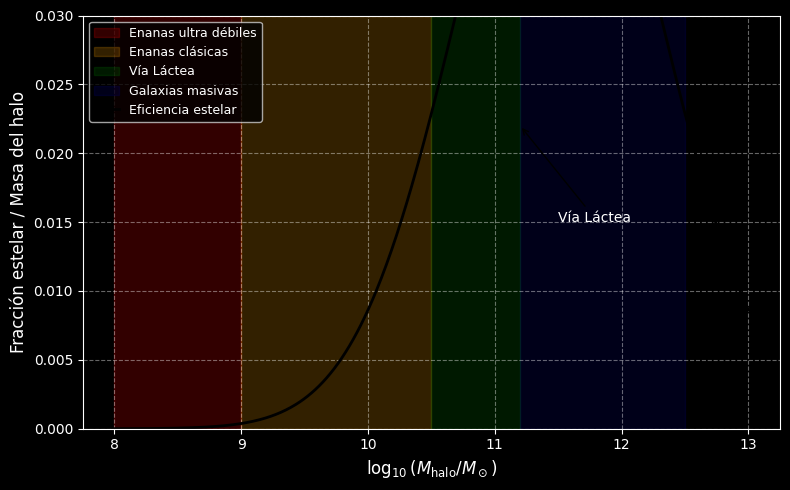

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Datos simulados para una curva log-normal (representación estilizada)
log_mhalo = np.linspace(8, 13, 500)  # log10(M_halo / M_sun)
mhalo = 10**log_mhalo
# Eficiencia estelar simulada (una especie de log-normal)
efficiency = 0.05 * np.exp(-((log_mhalo - 11.5)**2) / (2 * 0.8**2))

# Crear figura
fig, ax = plt.subplots(figsize=(8, 5))

# Sombreado de tipos de galaxias (colores suaves)
ax.axvspan(8, 9, color='red', alpha=0.2, label='Enanas ultra débiles')
ax.axvspan(9, 10.5, color='orange', alpha=0.2, label='Enanas clásicas')
ax.axvspan(10.5, 11.2, color='green', alpha=0.2, label='Vía Láctea')
ax.axvspan(11.2, 12.5, color='blue', alpha=0.1, label='Galaxias masivas')

# Curva de eficiencia
ax.plot(log_mhalo, efficiency, color='black', linewidth=2, label='Eficiencia estelar')

# Anotación de la Vía Láctea
ax.annotate('Vía Láctea',
            xy=(11.2, 0.022), xycoords='data',
            xytext=(11.5, 0.015), textcoords='data',
            arrowprops=dict(arrowstyle="->", color='black'))

# Escalas y etiquetas
ax.set_xlabel(r'$\log_{10}(M_{\mathrm{halo}}/M_\odot)$', fontsize=12)
ax.set_ylabel('Fracción estelar / Masa del halo', fontsize=12)
ax.set_ylim(0, 0.03)

# Leyenda
ax.legend(loc='upper left', fontsize=9)

# Estilo
ax.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:24: SyntaxWarning: invalid escape sequence '\o'
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_2480\3143611745.py:17: SyntaxWarning: invalid escape sequence '\o'
  label='Halo de Materia Oscura ($10^{12} M_\odot$)')
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_2480\3143611745.py:24: SyntaxWarning: invalid escape sequence '\o'
  alpha=0.4, label='Disco Estelar ($6×10^{10} M_\odot$)')
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_2480\3143611745.py:17: SyntaxWarning: invalid escape sequence '\o'
  label='Halo de Materia Oscura ($10^{12} M_\odot$)')
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_2480\3143611745.py:24: SyntaxWarning: invalid escape sequence '\o'
  alpha=0.4, label='Disco Estelar ($6×10^{10} M_\odot$)')


AttributeError: module 'matplotlib.pyplot' has no attribute 'effects'

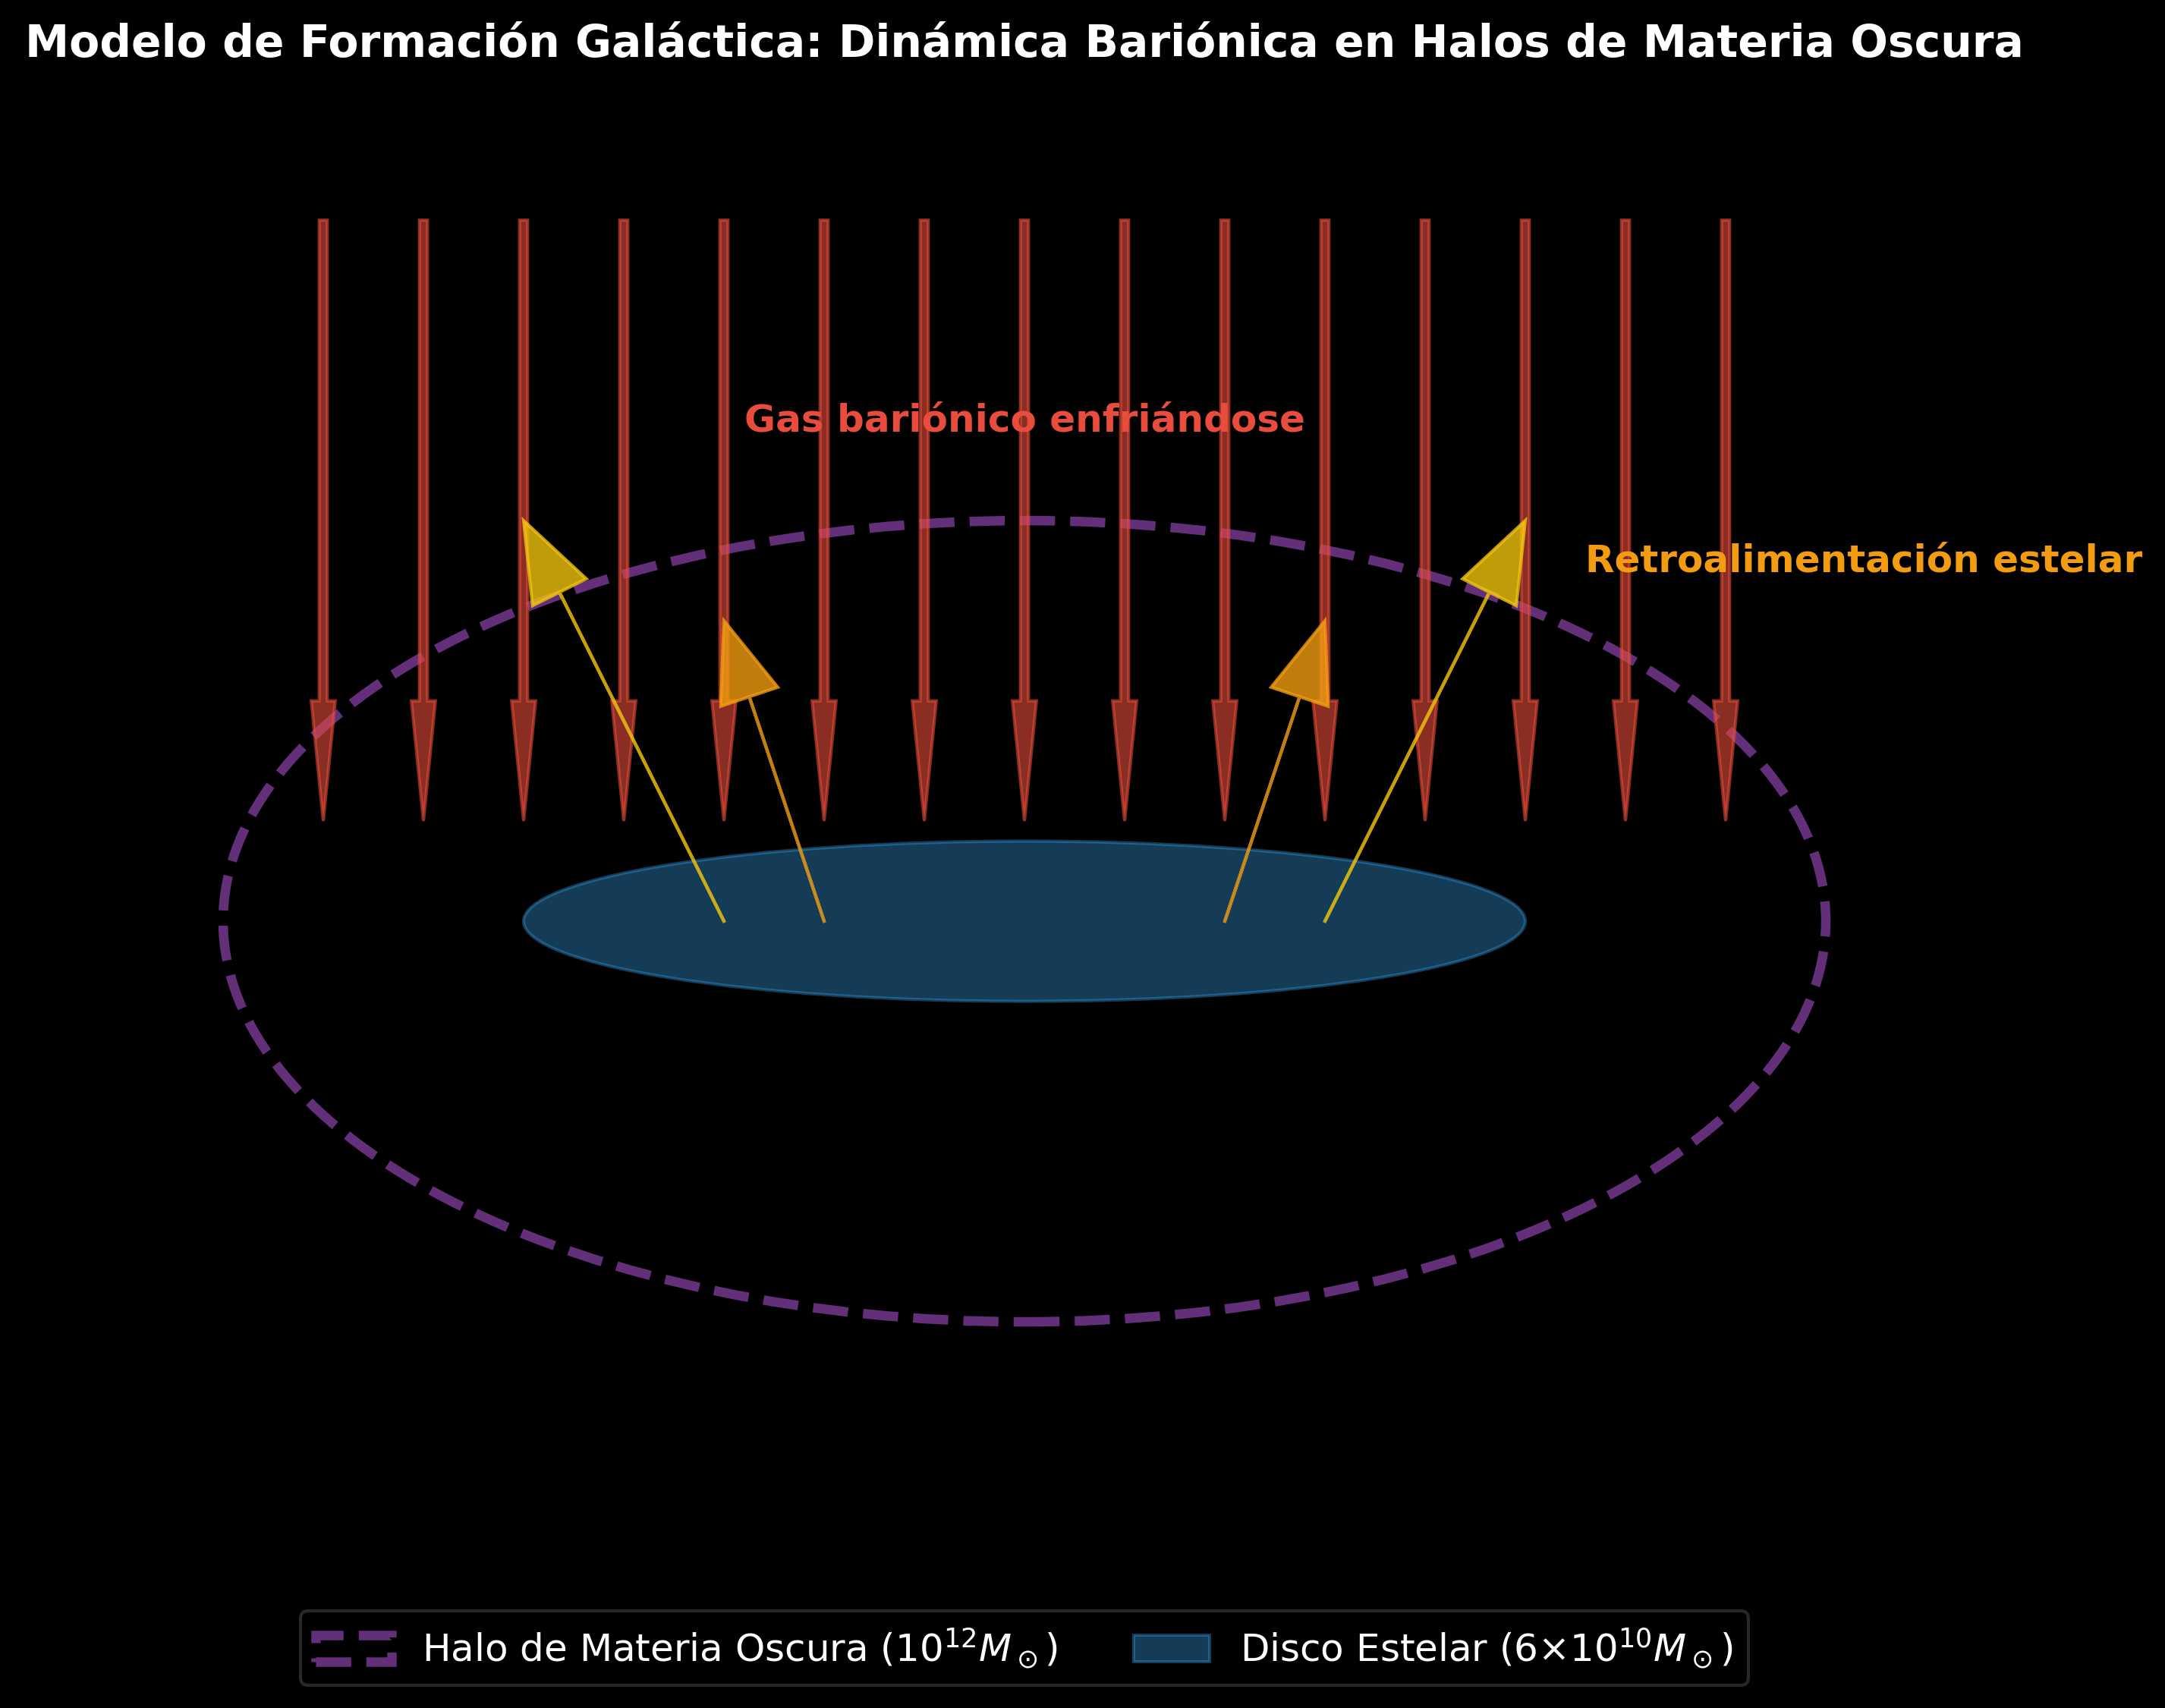

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Arrow
from matplotlib.collections import PatchCollection
import matplotlib.transforms as transforms

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

## ====================
## 1. Halo de Materia Oscura
## ====================
halo = Ellipse((0, 0), width=8, height=4, angle=0, 
               edgecolor='#8e44ad', facecolor='none', 
               linewidth=3, linestyle='--', alpha=0.7,
               label='Halo de Materia Oscura ($10^{12} M_\odot$)')

## ====================
## 2. Disco Galáctico
## ====================
disco = Ellipse((0, 0), width=5, height=0.8, angle=0,
                edgecolor='#3498db', facecolor='#3498db', 
                alpha=0.4, label='Disco Estelar ($6×10^{10} M_\odot$)')

## ====================
## 3. Flujos de Gas
## ====================
# Configuración para flechas de gas
np.random.seed(42)
x_positions = np.linspace(-3.5, 3.5, 15)
gas_arrows = []
for x in x_positions:
    arrow = Arrow(x, 3.5, 0, -3, width=0.2, 
                  color='#e74c3c', alpha=0.6)
    gas_arrows.append(arrow)

## ====================
## 4. Retroalimentación Estelar
## ====================
feedback_arrows = [
    {'x': 1.0, 'y': 0, 'dx': 0.5, 'dy': 1.5, 'color': '#f39c12'},
    {'x': -1.0, 'y': 0, 'dx': -0.5, 'dy': 1.5, 'color': '#f39c12'},
    {'x': 1.5, 'y': 0, 'dx': 1.0, 'dy': 2.0, 'color': '#f1c40f'},
    {'x': -1.5, 'y': 0, 'dx': -1.0, 'dy': 2.0, 'color': '#f1c40f'}
]

## ====================
## 5. Renderizado
## ====================
# Añadir elementos al plot
ax.add_patch(halo)
ax.add_patch(disco)

for arrow in gas_arrows:
    ax.add_patch(arrow)

for fb in feedback_arrows:
    ax.arrow(fb['x'], fb['y'], fb['dx'], fb['dy'], 
             head_width=0.3, head_length=0.4, 
             fc=fb['color'], ec=fb['color'], alpha=0.8,
             length_includes_head=True)

## ====================
## 6. Anotaciones y Estilo
## ====================
# Textos explicativos
ax.text(0, 2.5, 'Gas bariónico enfriándose', color='#e74c3c', 
        ha='center', va='center', fontsize=12, fontweight='bold')
ax.text(2.8, 1.8, 'Retroalimentación estelar', color='#f39c12', 
        ha='left', va='center', fontsize=12, fontweight='bold')

# Configuración de ejes y estilo
ax.set_xlim(-5, 5)
ax.set_ylim(-3, 4)
ax.set_aspect('equal')
ax.axis('off')

# Leyenda mejorada
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
                   ncol=2, framealpha=0.2, prop={'size': 12})
for text in legend.get_texts():
    text.set_color('white')

# Título científico
plt.title('Modelo de Formación Galáctica: Dinámica Bariónica en Halos de Materia Oscura',
          pad=20, fontsize=14, fontweight='bold')

# Añadir grid sutil
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Efecto de profundidad (sombras)
halo.set_path_effects([plt.effects.withSimplePatchShadow(offset=(1, -1), alpha=0.2)])
disco.set_path_effects([plt.effects.withSimplePatchShadow(offset=(0.5, -0.5), alpha=0.2)])

## ====================
## 7. Exportación
## ====================
plt.tight_layout()
plt.savefig('galaxy_formation_model.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()

<>:19: SyntaxWarning: invalid escape sequence '\o'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:46: SyntaxWarning: invalid escape sequence '\L'
<>:77: SyntaxWarning: invalid escape sequence '\o'
<>:19: SyntaxWarning: invalid escape sequence '\o'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:46: SyntaxWarning: invalid escape sequence '\L'
<>:77: SyntaxWarning: invalid escape sequence '\o'
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_2480\3403404876.py:19: SyntaxWarning: invalid escape sequence '\o'
  label='Halo Masivo ($>10^{13} M_\odot$)')
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_2480\3403404876.py:38: SyntaxWarning: invalid escape sequence '\m'
  'label': 'Presión de Soporte\n$kT > \mu m_p \Phi$', 'textpos': (3.8, 2.3)},
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_2480\3403404876.py:42: SyntaxWarning: invalid escape sequence '\s'
  'label': 'Retroalimentación de AG

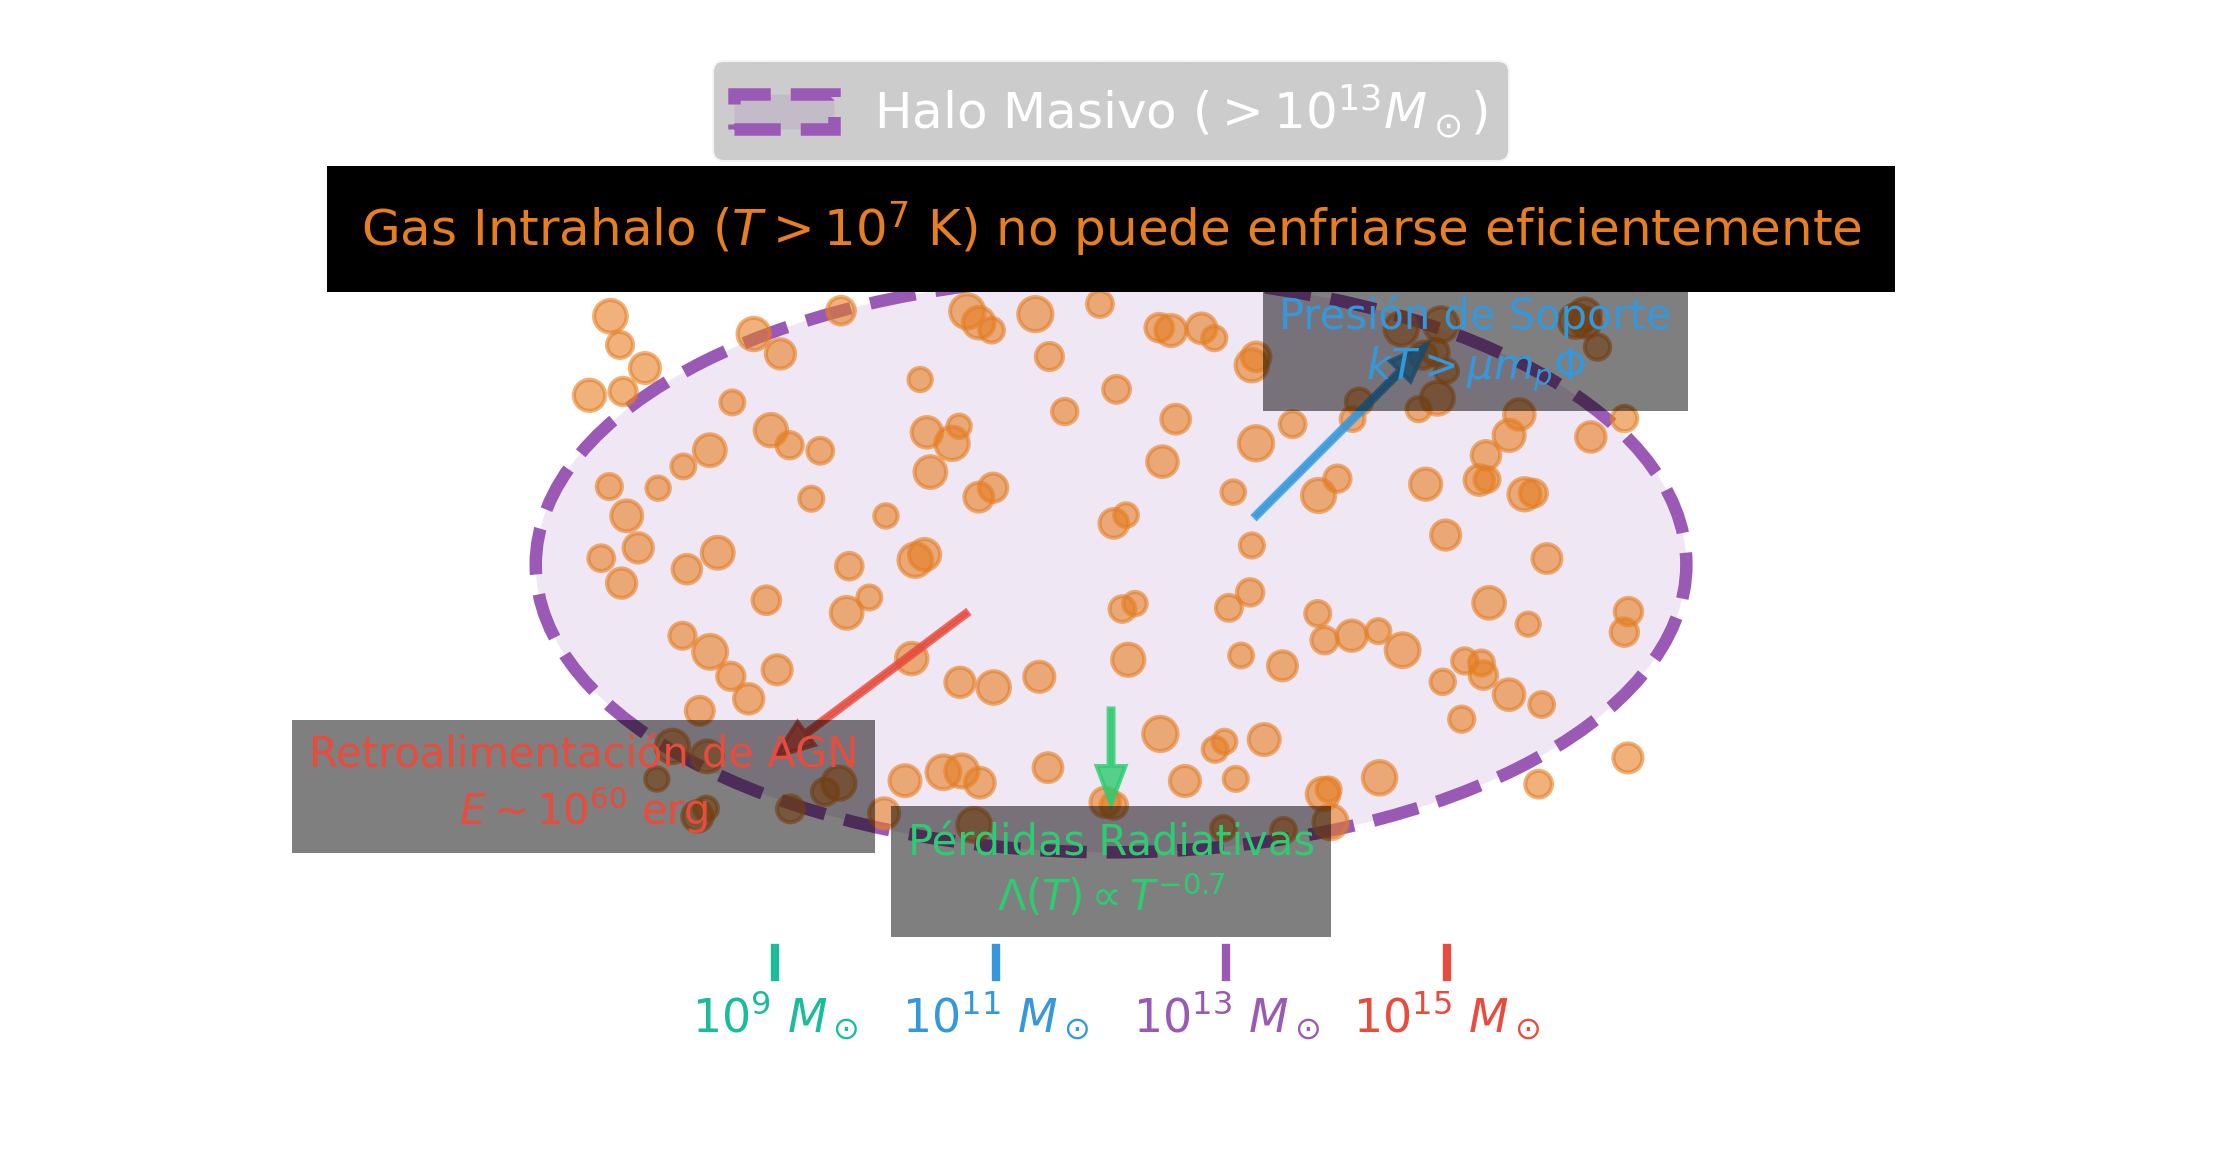

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Arrow, Circle
from matplotlib.collections import PatchCollection
import matplotlib.transforms as transforms

plt.style.use('dark_background')

# Configuración inicial
fig, ax = plt.subplots(figsize=(8,4), dpi=300)
fig.patch.set_alpha(0.0)  # Fondo totalmente transparente

# =============================================
# 1. HALO MASIVO (Grupo/Cúmulo Galáctico)
# =============================================
halo = Ellipse((0, 0), width=12, height=6, angle=0,
               edgecolor='#9b59b6', facecolor='#8e44ad20',
               linewidth=3, linestyle='--', zorder=1,
               label='Halo Masivo ($>10^{13} M_\odot$)')

# =============================================
# 2. GAS CALIENTE INTRACUMULAR
# =============================================
np.random.seed(42)
gas_particles = []
for _ in range(150):
    x = np.random.uniform(-5.5, 5.5)
    y = np.random.uniform(-2.8, 2.8)
    size = np.random.uniform(0.8, 1.2)
    gas_particles.append(Circle((x, y), 0.15*size, color='#e67e22', alpha=0.6))

# =============================================
# 3. MECANISMOS DE SUPRESIÓN (Flechas explicativas)
# =============================================
mechanisms = [
    # Presión de soporte
    {'x': 1.5, 'y': 0.5, 'dx': 1.8, 'dy': 1.8, 'color': '#3498db', 
     'label': 'Presión de Soporte\n$kT > \mu m_p \Phi$', 'textpos': (3.8, 2.3)},
    
    # Retroalimentación de AGN
    {'x': -1.5, 'y': -0.5, 'dx': -2.0, 'dy': -1.5, 'color': '#e74c3c', 
     'label': 'Retroalimentación de AGN\n$E \sim 10^{60}$ erg', 'textpos': (-5.5, -2.3)},
    
    # Pérdidas radiativas
    {'x': 0, 'y': -1.5, 'dx': 0, 'dy': -1.0, 'color': '#2ecc71', 
     'label': 'Pérdidas Radiativas\n$\Lambda(T) \propto T^{-0.7}$', 'textpos': (0, -3.2)}
]

# =============================================
# 4. ESCALA DE MASA (Barra inferior)
# =============================================
mass_scales = [
    {'mass': '$10^9$', 'x': -3.5, 'color': '#1abc9c'},
    {'mass': '$10^{11}$', 'x': -1.2, 'color': '#3498db'},
    {'mass': '$10^{13}$', 'x': 1.2, 'color': '#9b59b6'},
    {'mass': '$10^{15}$', 'x': 3.5, 'color': '#e74c3c'}
]

# =============================================
# RENDERIZADO
# =============================================
ax.add_patch(halo)
ax.add_collection(PatchCollection(gas_particles, match_original=True))

# Añadir mecanismos
for mech in mechanisms:
    ax.arrow(mech['x'], mech['y'], mech['dx'], mech['dy'],
             head_width=0.3, head_length=0.4, fc=mech['color'], ec=mech['color'],
             length_includes_head=True, width=0.05, alpha=0.8)
    ax.text(*mech['textpos'], mech['label'], color=mech['color'],
            ha='center', va='center', fontsize=10, bbox=dict(facecolor='#00000080', edgecolor='none', pad=4))

# Añadir escala de masa
ax.plot([-4.5, 4.5], [-4, -4], 'w-', lw=2)
for scale in mass_scales:
    ax.plot([scale['x'], scale['x']], [-4, -4.3], '-', color=scale['color'], lw=2)
    ax.text(scale['x'], -4.7, scale['mass']+' $M_\odot$', 
            color=scale['color'], ha='center', va='center', fontsize=11)

ax.text(0, -5.5, 'Masa del Halo', color='white', ha='center', va='center', fontsize=12)

# =============================================
# ESTILO FINAL
# =============================================
ax.set_xlim(-7, 7)
ax.set_ylim(-6, 4)
ax.set_aspect('equal')
ax.axis('off')

# Leyenda científica
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
                   ncol=1, framealpha=0.2, prop={'size': 12})
for text in legend.get_texts():
    text.set_color('white')

# Título profesional
plt.title('Mecanismos de Supresión de Formación Estelar en Halos Masivos',
          pad=25, fontsize=14, fontweight='bold', color='white')

# Añadir texto explicativo
ax.text(0, 3.5, 'Gas Intrahalo ($T > 10^7$ K) no puede enfriarse eficientemente',
        color='#e67e22', ha='center', va='center', fontsize=12,
        bbox=dict(facecolor='black', edgecolor='none', pad=8))

plt.tight_layout()
plt.show()